# SD-TSIA-204: TP1

## Setup:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import eig, inv
from scipy.stats import t
from sklearn.linear_model import LinearRegression

#### Q1: Import the data from the file “invest.txt” and print them in a readable form, e.g. a table containing first 5 observations.

In [3]:
df = pd.read_csv("./data/invest.csv", sep=" ")
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


#### Q2: Plot the data with Gross National Product (GNP, column “gnp”) being the abscissa and Investment (column “invest”) being the ordinate.

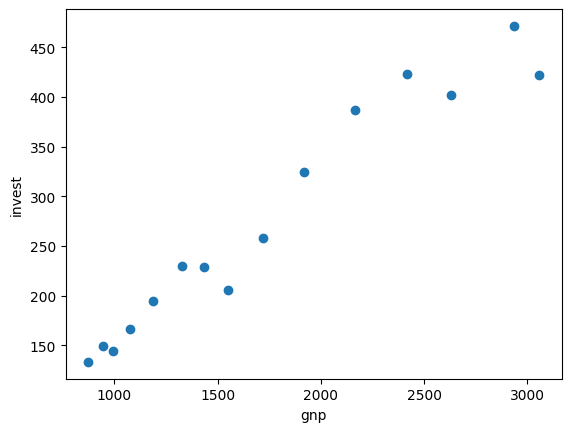

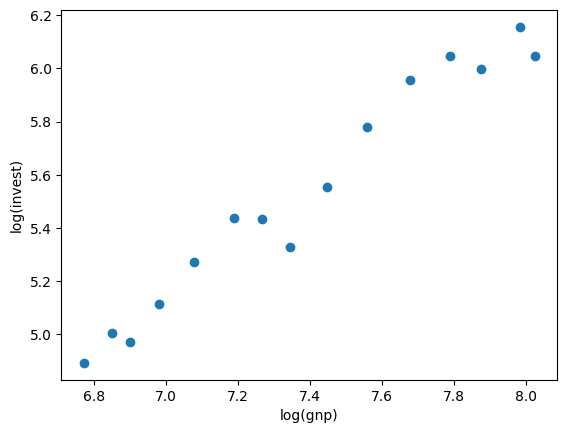

In [4]:
plt.scatter(df["gnp"], df["invest"])
plt.xlabel("gnp")
plt.ylabel("invest")
plt.show()

lgnp = np.log(df["gnp"])
linvest = np.log(df["invest"])

plt.scatter(lgnp, linvest)
plt.xlabel("log(gnp)")
plt.ylabel("log(invest)")
plt.show()

#### Q3: For the linear regression of Investment on GNP, estimate the intercept and the slope and their standard deviations, as well as the determination coefficient for the ordinary least squares. Output them in a readable form.

In [5]:
x_bar = lgnp.mean()
y_bar = linvest.mean()

# slope
beta1 = np.sum((lgnp - x_bar) * (linvest - y_bar)) / np.sum((lgnp - x_bar) ** 2)
# intercept
beta0 = y_bar - beta1 * x_bar
print("beta0:", beta0)
print("beta1:", beta1)

sigma2 = (1 / (len(lgnp) - 2)) * np.sum((linvest - beta0 - beta1 * lgnp) ** 2)
print("sigma2:", sigma2)

std_beta0 = np.sqrt(
    sigma2 * ((1 / len(lgnp)) + (x_bar**2) / np.sum((lgnp - x_bar) ** 2))
)
std_beta1 = np.sqrt(sigma2 / np.sum((lgnp - x_bar) ** 2))
print("std_beta0:", std_beta0)
print("std_beta1:", std_beta1)

r_squared = 1 - np.sum((linvest - beta0 - beta1 * lgnp) ** 2) / np.sum(
    (linvest - y_bar) ** 2
)
print("r_squared:", r_squared)

beta0: -1.9635913352301815
beta1: 1.015281401598871
sigma2: 0.0076763385554603665
std_beta0: 0.40954727166230726
std_beta1: 0.05538306035485269
r_squared: 0.9627572956057857


#### Q4: Test the significance of the slope using the Student-t test. Report the value of the test statistic and the p-value.

In [6]:
n = len(lgnp)
p = 1
alpha = 0.1

c = t.ppf(1 - alpha / 2, n - p - 1)
print("c:", c)

t_stat = beta1 / std_beta1
print("T-statistic:", t_stat)

p_value = 2 * (1 - t.cdf(t_stat, n - p - 1))
print("p_value:", p_value)

if -c <= t_stat <= c:
    print("Fail to reject H0")
else:
    print("H0 is rejected")

c: 1.7709333959867988
T-statistic: 18.33198445686672
p_value: 1.1363709973011282e-10
H0 is rejected


#### Q5: For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction intervals for the 90% level.

In [7]:
# GNP = 1000
CI = [
    (
        beta0
        + beta1 * np.log(1000)
        - t.ppf(1 - alpha / 2, n - 2)
        * np.sqrt(sigma2)
        * np.sqrt(1 / n + (np.log(1000) - x_bar) ** 2 / np.sum((lgnp - x_bar) ** 2))
    ),
    (
        beta0
        + beta1 * np.log(1000)
        + t.ppf(1 - alpha / 2, n - 2)
        * np.sqrt(sigma2)
        * np.sqrt(1 / n + (np.log(1000) - x_bar) ** 2 / np.sum((lgnp - x_bar) ** 2))
    ),
]

PI = [
    (
        beta0
        + beta1 * np.log(1000)
        - t.ppf(1 - alpha / 2, n - 2)
        * np.sqrt(sigma2)
        * np.sqrt(
            1 + 1 / n + (np.log(1000) - x_bar) ** 2 / np.sum((lgnp - x_bar) ** 2)
        )
    ),
    (
        beta0
        + beta1 * np.log(1000)
        + t.ppf(1 - alpha / 2, n - 2)
        * np.sqrt(sigma2)
        * np.sqrt(
            1 + 1 / n + (np.log(1000) - x_bar) ** 2 / np.sum((lgnp - x_bar) ** 2)
        )
    ),
]
y_est = beta0 + beta1 * np.log(1000)

print("\nQ5:")
print("Predicted Investment for GNP = 1000:", y_est)
print("90% CI:", CI)
print("90% PI:", PI)


Q5:
Predicted Investment for GNP = 1000: 5.049724126316802
90% CI: [4.98822284597111, 5.111225406662493]
90% PI: [4.882820023438682, 5.216628229194922]


#### Q6: On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the estimated regression line, the confidence and prediction intervals for all values of log(GNP) between its minimum and maximum in the data set.

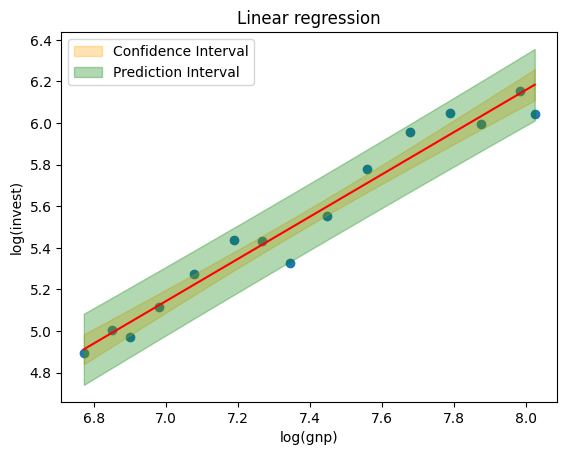

In [8]:
CI_lower = [
    (
        beta0
        + beta1 * lgnp[i]
        - t.ppf(1 - alpha / 2, n - 2)
        * np.sqrt(sigma2)
        * np.sqrt(1 / n + (lgnp[i] - x_bar) ** 2 / np.sum((lgnp - x_bar) ** 2))
    )
    for i in range(n)
]
CI_upper = [
    (
        beta0
        + beta1 * lgnp[i]
        + t.ppf(1 - alpha / 2, n - 2)
        * np.sqrt(sigma2)
        * np.sqrt(1 / n + (lgnp[i] - x_bar) ** 2 / np.sum((lgnp - x_bar) ** 2))
    )
    for i in range(n)
]

PI_lower = [
    (
        beta0
        + beta1 * lgnp[i]
        - t.ppf(1 - alpha / 2, n - 2)
        * np.sqrt(sigma2)
        * np.sqrt(1 + 1 / n + (lgnp[i] - x_bar) ** 2 / np.sum((lgnp - x_bar) ** 2))
    )
    for i in range(n)
]
PI_upper = [
    (
        beta0
        + beta1 * lgnp[i]
        + t.ppf(1 - alpha / 2, n - 2)
        * np.sqrt(sigma2)
        * np.sqrt(1 + 1 / n + (lgnp[i] - x_bar) ** 2 / np.sum((lgnp - x_bar) ** 2))
    )
    for i in range(n)
]

plt.scatter(lgnp, linvest)
plt.xlabel("log(gnp)")
plt.ylabel("log(invest)")
plt.plot(lgnp, beta0 + beta1 * lgnp, color="red")
plt.fill_between(
    lgnp, CI_lower, CI_upper, color="orange", alpha=0.3, label="Confidence Interval"
)
plt.fill_between(
    lgnp, PI_lower, PI_upper, color="green", alpha=0.3, label="Prediction Interval"
)
plt.title("Linear regression")
plt.legend()
plt.show()

#### Q7:  Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value 1000 using existing functionality. The class LinearRegression() from sklearn.linear_model is suggested but not obligatory ; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation.

In [9]:
x = np.log(1000)
model = LinearRegression().fit(lgnp.values.reshape(-1, 1), linvest)
y_pred = model.predict(x.reshape(1, -1))

print("beta0:", model.intercept_)
print("beta1:", model.coef_[0])
print("r_squared:", model.score(lgnp.values.reshape(-1, 1), linvest))
print("Predicted Investment for GNP = 1000:", y_pred)

beta0: -1.9635913352301833
beta1: 1.0152814015988711
r_squared: 0.9627572956057855
Predicted Investment for GNP = 1000: [5.04972413]


#### Q8: On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the regression line and the predicted point (in a different color). The graphic should coincide with the corresponding elements from the one in Step 6.

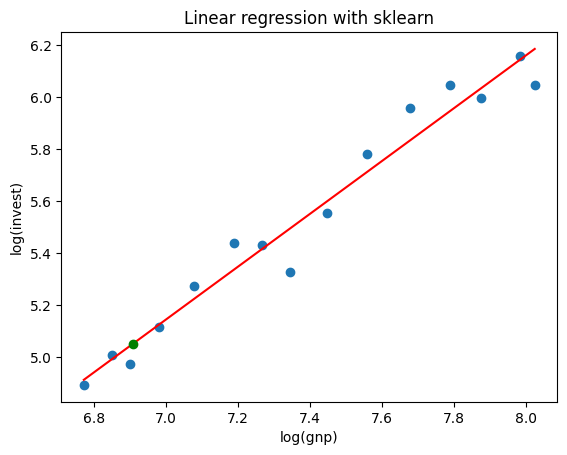

In [10]:
plt.scatter(lgnp, linvest)
plt.xlabel("log(gnp)")
plt.ylabel("log(invest)")
plt.plot(lgnp, model.intercept_ + model.coef_[0] * lgnp, color="red")
plt.plot(np.log(1000), y_pred, "o", color="green")
plt.title("Linear regression with sklearn")
plt.show()

#### Q9: For the linear regression of Investment on GNP and Interest, compute the associated Gram matrix. Is it of full rank ?

In [11]:
gnp = df["gnp"]
interest = df["interest"]

X = np.column_stack((gnp, interest))

G = np.dot(X.T, X)
eig_vals, eig_vecs = eig(np.dot(G.T, G))
n_eig_zero = np.count_nonzero(eig_vals == 0)
rank_G = G.shape[0] - n_eig_zero

print("Gram Matrix:", G)
print("Rank of Gram Matrix:", rank_G)

# Check if the Gram matrix is of full rank
if rank_G == min(X.shape):
    print("The Gram matrix is of full rank.")
else:
    print("The Gram matrix is not of full rank.")

Gram Matrix: [[5.34945068e+07 2.21033896e+05]
 [2.21033896e+05 9.43855700e+02]]
Rank of Gram Matrix: 2
The Gram matrix is of full rank.


#### Q10: For the linear regression of Investment on GNP and Interest, estimate the three regression coefficients and their standard deviations, as well as the determination coefficient for the ordinary least squares. Additionally, test significance of each coefficient using the Student-t test. Report the regression coefficients, corresponding to them p-values, and the determination coefficient in a readable form. Discuss significance of the estimated regression coefficients.

In [12]:
y_bar = linvest.mean()
X = np.column_stack((np.ones(n), lgnp, interest))

beta = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, linvest))
print("beta0:", beta[0])
print("beta1:", beta[1])
print("beta2:", beta[2])

sigma2 = (1 / (n - 3)) * np.sum(
    (linvest - beta[0] - beta[1] * lgnp - beta[2] * interest) ** 2
)
C = sigma2 * inv(np.dot(X.T, X))
std_beta0 = np.sqrt(C[0, 0])
std_beta1 = np.sqrt(C[1, 1])
std_beta2 = np.sqrt(C[2, 2])
print("std_beta0:", std_beta0)
print("std_beta1:", std_beta1)
print("std_beta2:", std_beta2)

r_squared = 1 - np.sum(
    (linvest - beta[0] - beta[1] * lgnp - beta[2] * interest) ** 2
) / np.sum((linvest - y_bar) ** 2)
print("r_squared:", r_squared)

n = len(lgnp)
alpha = 0.1

c = t.ppf(1 - alpha / 2, n - 3)
print("c:", c)

for i in range(len(beta)):
    print(f"\nBeta {i}:")
    t_stat = beta[i] / np.sqrt(C[i, i])
    print("T-statistic:", t_stat)

    p_value = 2 * (1 - t.cdf(t_stat, n - 3))
    print("p_value:", p_value)

    if -c <= t_stat <= c:
        print("Fail to reject H0")
    else:
        print("H0 is rejected")

beta0: -2.1804547259128864
beta1: 1.051242691319916
beta2: -0.006528879406094865
std_beta0: 0.6623991977963785
std_beta1: 0.1020613780619246
std_beta2: 0.015344205065604377
r_squared: 0.9633108306726242
c: 1.782287555649159

Beta 0:
T-statistic: -3.2917532707869586
p_value: 1.9935616329490913
H0 is rejected

Beta 1:
T-statistic: 10.300102852639187
p_value: 2.5995168484449493e-07
H0 is rejected

Beta 2:
T-statistic: -0.4254947961253479
p_value: 1.3219928581173568
Fail to reject H0


#### Q11: For the values of GNP = 1000 and Interest = 10, predict the log(Investment) and provide confident and prediction intervals at the 99.9% level.

In [13]:
alpha = 0.001
c = t.ppf(1 - alpha / 2, n - 3)

x_pred = np.array([1, np.log(1000), 10])
y_pred = np.dot(x_pred, beta)

CI = [
    y_pred
    - c
    * np.sqrt(sigma2)
    * np.sqrt(np.dot(np.dot(x_pred, inv(np.dot(X.T, X))), x_pred.T)),
    y_pred
    + c
    * np.sqrt(sigma2)
    * np.sqrt(np.dot(np.dot(x_pred, inv(np.dot(X.T, X))), x_pred.T)),
]

PI = [
    y_pred
    - c
    * np.sqrt(sigma2)
    * np.sqrt(1 + np.dot(np.dot(x_pred, inv(np.dot(X.T, X))), x_pred.T) + 1 / n),
    y_pred
    + c
    * np.sqrt(sigma2)
    * np.sqrt(1 + np.dot(np.dot(x_pred, inv(np.dot(X.T, X))), x_pred.T) + 1 / n),
]

print("Predicted Investment for GNP = 1000 and Interest = 10:", y_pred)
print("99.9% CI:", CI)
print("99.9% PI:", PI)

Predicted Investment for GNP = 1000 and Interest = 10: 5.015983730482704
99.9% CI: [4.6401840366880975, 5.39178342427731]
99.9% PI: [4.464493159987949, 5.567474300977459]


#### Q12: On a same 3D-plot with axes being log(GNP), Interest, and log(Invetment), draw data points, their predictions, regression plane and surfaces of the 99.9% confidence intervals for each pair of values of log(GNP) and Interest between their minimum and maximum.

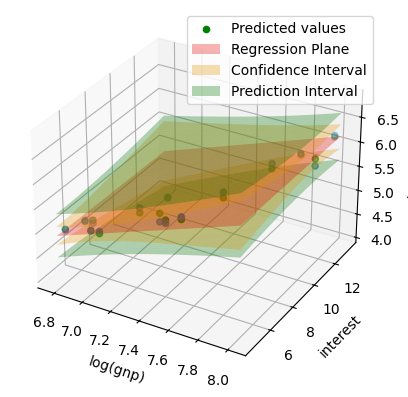

In [14]:
y_pred = np.dot(X, beta)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# plot data points
ax.scatter(lgnp, interest, linvest)
ax.set_xlabel("log(gnp)")
ax.set_ylabel("interest")
ax.set_zlabel("log(invest)")

# plot predicted values
ax.scatter(lgnp, interest, y_pred, color="green", label="Predicted values")

# plot regression plane
x_surf = np.linspace(min(lgnp), max(lgnp), 50)
y_surf = np.linspace(min(interest), max(interest), 50)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = beta[0] + beta[1] * x_surf + beta[2] * y_surf
ax.plot_surface(
    x_surf, y_surf, z_surf, color="red", alpha=0.3, label="Regression Plane"
)

# plot confidence interval plane
CI_lower = np.zeros((50, 50))
CI_upper = np.zeros((50, 50))
for i in range(50):
    for j in range(50):
        x_pred = np.array([1, x_surf[i, j], y_surf[i, j]])
        CI_lower[i, j] = np.dot(x_pred, beta) - c * np.sqrt(sigma2) * np.sqrt(
            np.dot(np.dot(x_pred, inv(np.dot(X.T, X))), x_pred.T)
        )
        CI_upper[i, j] = np.dot(x_pred, beta) + c * np.sqrt(sigma2) * np.sqrt(
            np.dot(np.dot(x_pred, inv(np.dot(X.T, X))), x_pred.T)
        )

ax.plot_surface(
    x_surf,
    y_surf,
    CI_lower,
    color="orange",
    alpha=0.3,
    label="Confidence Interval",
)
ax.plot_surface(
    x_surf,
    y_surf,
    CI_upper,
    color="orange",
    alpha=0.3,
)

# plot prediction interval plane
PI_lower = np.zeros((50, 50))
PI_upper = np.zeros((50, 50))

for i in range(50):
    for j in range(50):
        x_pred = np.array([1, x_surf[i, j], y_surf[i, j]])
        PI_lower[i, j] = np.dot(x_pred, beta) - c * np.sqrt(sigma2) * np.sqrt(
            1 + np.dot(np.dot(x_pred, inv(np.dot(X.T, X))), x_pred.T) + 1 / n
        )
        PI_upper[i, j] = np.dot(x_pred, beta) + c * np.sqrt(sigma2) * np.sqrt(
            1 + np.dot(np.dot(x_pred, inv(np.dot(X.T, X))), x_pred.T) + 1 / n
        )

ax.plot_surface(
    x_surf,
    y_surf,
    PI_lower,
    color="green",
    alpha=0.3,
    label="Prediction Interval",
)

ax.plot_surface(
    x_surf,
    y_surf,
    PI_upper,
    color="green",
    alpha=0.3,
)

ax.legend()
plt.show()

#### Q13:  Estimate the regression and determination coefficients and predict the necessary log(Investment) for GNP = 1000 and Interest = 10 using existing functionality. Again, the class LinearRegression() from sklearn.linear_model is suggested but not obligatory ; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated ‘by hand’ (Steps 10 and 11) coincide with the ones obtained using existing implementation.

In [15]:
model = LinearRegression().fit(X, linvest)
y_pred = model.predict(np.array([1, np.log(1000), 10]).reshape(1, -1))

print("beta0:", model.intercept_)
print("beta1:", model.coef_[1])
print("beta2:", model.coef_[2])
print("r_squared:", model.score(X, linvest))
print("Predicted Investment for GNP = 1000, Interest = 10:", y_pred)

beta0: -2.1804547259113995
beta1: 1.0512426913196593
beta2: -0.0065288794060685
r_squared: 0.9633108306726244
Predicted Investment for GNP = 1000, Interest = 10: [5.01598373]
